___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [164]:
df = pd.read_csv("/Users/levent/Downloads/heart.csv")

# EDA

In [165]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [166]:
df.shape

(303, 14)

In [167]:
df.info()
#we dont have any null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [168]:
df[["age","trestbps","chol","thalach","oldpeak"]].describe()
#didnt detect any outliers

,age,trestbps,chol,thalach,oldpeak
count,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040
std,9.082,17.538,51.831,22.905,1.161
min,29.000,94.000,126.000,71.000,0.000
25%,47.500,120.000,211.000,133.500,0.000
50%,55.000,130.000,240.000,153.000,0.800
75%,61.000,140.000,274.500,166.000,1.600
max,77.000,200.000,564.000,202.000,6.200


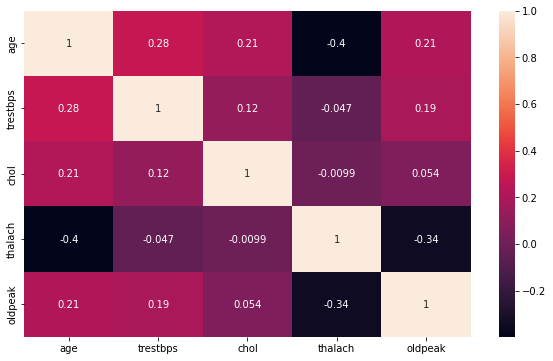

In [169]:
sns.heatmap(df[["age","trestbps","chol","thalach","oldpeak"]].corr(),annot=True);
#as seen from the heatmap there is not a high enough correlation in any of the continious variables
#therefore, we dont need to be concerned about multicolenary

# Data Preprocessing

In [170]:
X = df.drop('target',axis=1)
y = df['target']

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [173]:
scaler = StandardScaler()

In [174]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [176]:
log_model = LogisticRegression(max_iter=5000)

In [177]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty" : penalty,
             "C" : C}

In [178]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5) 

In [179]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [180]:
grid_model.best_params_

{'C': 0.20691380811147897, 'penalty': 'l2'}

In [181]:
grid_model.best_score_

0.8304540420819491

In [182]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0])

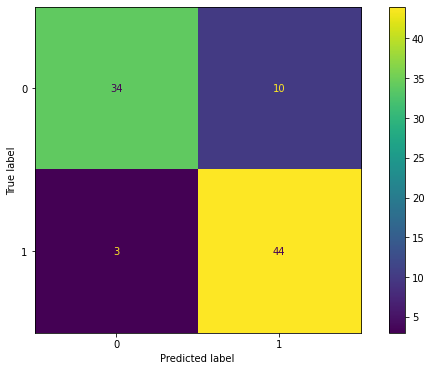

In [183]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [184]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [185]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[34 10]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91


Train_Set
[[ 71  23]
 [ 11 107]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        94
           1       0.82      0.91      0.86       118

    accuracy                           0.84       212
   macro avg       0.84      0.83      0.83       212
weighted avg       0.84      0.84      0.84       212



In [186]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.816
test_precision_weighted   0.828
test_recall_weighted      0.816
test_f1_weighted          0.812
dtype: float64

# Implement KNN and Evaluate

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [189]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [190]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0])

In [191]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [192]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.000,0.000
1,0.000,1.000
2,0.000,1.000
3,0.000,1.000
4,1.000,0.000
...,...,...
86,0.800,0.200
87,0.600,0.400
88,0.600,0.400
89,0.600,0.400


In [193]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [194]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
206,0,0,0.200,0.800
178,0,0,0.200,0.800
13,1,1,0.600,0.400
55,1,1,1.000,0.000
161,1,1,0.800,0.200
187,0,0,0.000,1.000
154,1,1,1.000,0.000
265,0,0,0.200,0.800
17,1,1,0.600,0.400
198,0,0,0.200,0.800


In [195]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

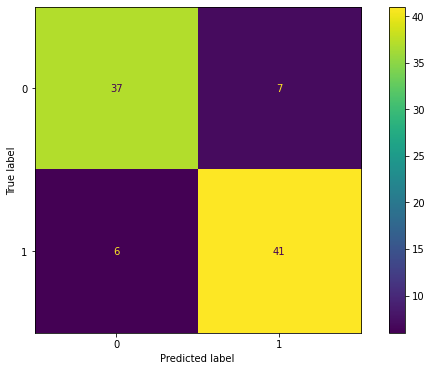

In [196]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [197]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  7]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.85      0.87      0.86        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [198]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [199]:
from sklearn.model_selection import GridSearchCV
#choosing the best parameters with gridsearch method

In [200]:
knn_grid = KNeighborsClassifier()

In [201]:
k_values= range(1,30)

In [202]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [203]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [204]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [205]:
knn_grid_model.best_params_

{'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}

In [206]:
print('WITH K=10\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set
[[36  8]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91


Train_Set
[[ 78  16]
 [ 12 106]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        94
           1       0.87      0.90      0.88       118

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212



# Visually compare models based on your chosen metric

In [207]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

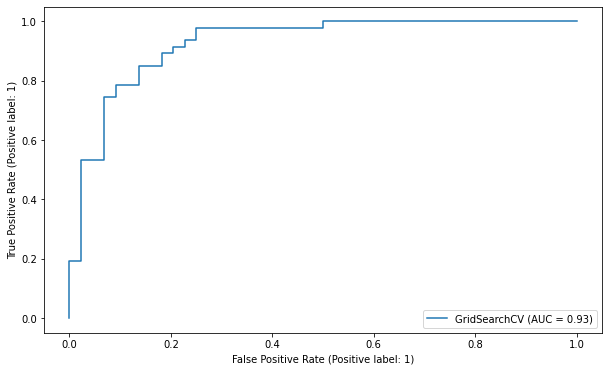

In [208]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

In [209]:
y_pred_proba = grid_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9269825918762089

In [210]:
knn_model = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)

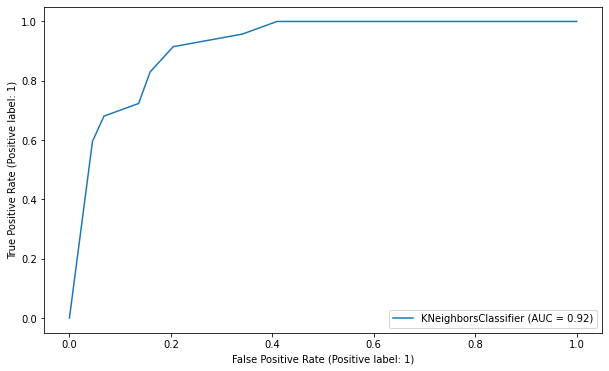

In [211]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [212]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9185203094777563

# Chose best model and make a random prediction 

In [213]:
#logistic regression is chosen beacause it has greater auc score

In [214]:
scaler = StandardScaler().fit(X)

In [215]:
import pickle
pickle.dump(scaler, open("scaler_heart_stroke", 'wb'))

In [216]:
X_scaled = scaler.transform(X)

In [217]:
final_model = LogisticRegression().fit(X_scaled, y)

In [218]:
pickle.dump(final_model, open("final_model_heart_stroke", 'wb'))

In [219]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [220]:
my_dict = {"age": [30, 58, 25],
           "sex": [0, 0, 1],
           "cp": [1, 2, 1],
           "trestbps": [100, 130, 150],
           "chol": [211, 240, 160],
           "fbs": [0, 1, 1],
           "restecg": [2, 1, 2],
           "thalach": [140, 80, 102],
           "exang": [0, 1, 1],
           "oldpeak": [0.9, 1.3, 2.3],
           "slope": [2, 1, 2],
           "ca": [4, 0, 1],
           "thal": [3, 3, 2]

          }

In [221]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,30,0,1,100,211,0,2,140,0,0.900,2,4,3
1,58,0,2,130,240,1,1,80,1,1.300,1,0,3
2,25,1,1,150,160,1,2,102,1,2.300,2,1,2


In [222]:
scaler_heart_stroke = pickle.load(open("scaler_heart_stroke", "rb"))

In [223]:
sample_scaled = scaler_heart_stroke.transform(sample)
sample_scaled

array([[-2.68733467, -1.46841752,  0.03203122, -1.80612489, -0.68149432,
        -0.41763453,  2.80375634, -0.42186226, -0.69663055, -0.12043572,
         0.97635214,  3.20361543,  1.12302895],
       [ 0.40075247, -1.46841752,  1.00257707, -0.09273778, -0.12105533,
         2.394438  ,  0.89896224, -3.04569256,  1.43548113,  0.22464251,
        -0.64911323, -0.71442887,  1.12302895],
       [-3.23877881,  0.68100522,  0.03203122,  1.04952029, -1.66709392,
         2.394438  ,  2.80375634, -2.08362145,  1.43548113,  1.08733806,
         0.97635214,  0.26508221, -0.51292188]])

In [224]:
final_model = pickle.load(open("final_model_heart_stroke", "rb"))

In [225]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [227]:
sample["pred"] = predictions
sample["pred_proba_stroke"] = predictions_proba[:,0]
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred,pred_proba_stroke
0,30,0,1,100,211,0,2,140,0,0.900,2,4,3,1,0.426
1,58,0,2,130,240,1,1,80,1,1.300,1,0,3,0,0.556
2,25,1,1,150,160,1,2,102,1,2.300,2,1,2,0,0.806
